Максимальное значение = 99.0
Минимальное значение = -401.0
Значение индекса, начиная с которого будет сделано свыше 10 шагов в одну сторону =  0
Значение индекса, с которого будет сделано максимальное количество шагов в одну сторону = 499


IndexError: index 1000 is out of bounds for axis 0 with size 1000

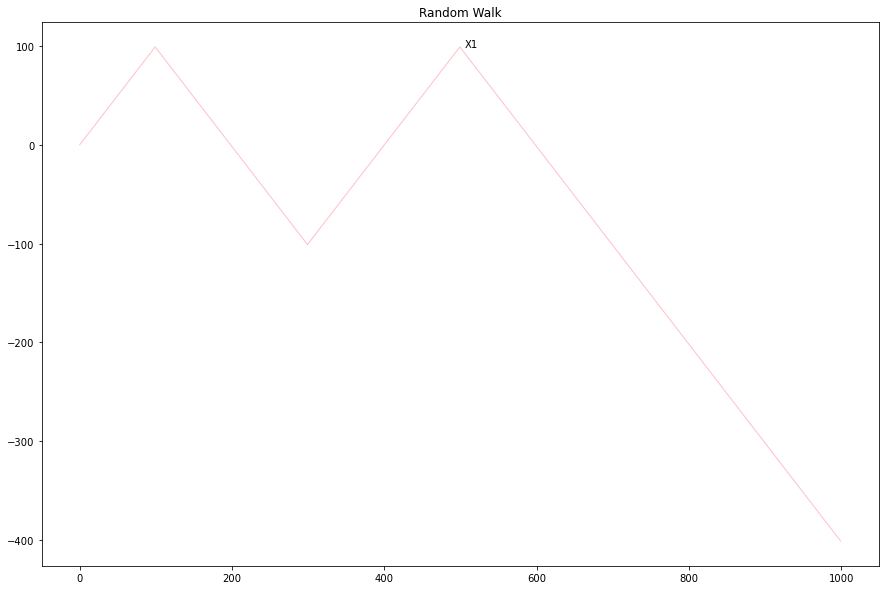

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Создаем массив шагов walk_steps и массив случайных блужданий walk
walk_steps = np.random.choice((1, -1), 1000)
walk_steps[0] = 0
walk = np.cumsum(walk_steps)


### мой тест

my_list = np.zeros(1000)
my_list[1:100] = 1
my_list[100:300] = -1
my_list[300:500] = 1
my_list[500:1000] = -1

mu_list_cum = np.cumsum(my_list)
walk_steps = my_list
walk = mu_list_cum

### ломается если максимум на последнем участке



# Поиск индекса, начиная с которогу будет сделано более 10 шагов в 1 сторону
for i in range(0, 999):
  j = j + 1 if walk_steps[i] == walk_steps[i + 1] else 0
  if j == 10 :
    break
if j != 10 :
    print("Свыше 10 шагов в одну сторону нет")
    q = -1
else:
    q = i - j
    
# Поиск индекса, начиная с которого будет сделано макимальное количество шагов в одну сторону
j = 0
n = 0
for i in range(1, 1000):
  j=j+1 if walk_steps[i - 1] == walk_steps[i] else 0
  if j >= n:
    n = j
    c = i - n - 1
    v = n + 2

# Вывод результатов
print("Максимальное значение =" , max(walk))
print("Минимальное значение =", min(walk))
print("Значение индекса, начиная с которого будет сделано свыше 10 шагов в одну сторону = ", q)
print("Значение индекса, с которого будет сделано максимальное количество шагов в одну сторону =", c)

# Графическое представление
plt.figure(figsize=(15,10))
plt.plot(walk, color='pink', linewidth=1)
plt.title("Random Walk")
plt.annotate("X1", (c + 7, walk[c]))
plt.annotate("X2", (c + v + 7, walk[c + v]))
plt.annotate("MIN", (np.where(walk == min(walk))[0][0] + 10, min(walk) - 1))
plt.annotate("MAX", (np.where(walk == max(walk))[0][0] + 5, max(walk)))
plt.plot(range(c - 2, (c + v) - 2), walk[c : (c + v)],'g-', label = "участок с макс. количеством шагов в одну сторону")
plt.plot(np.where(walk == min(walk))[0][0], min(walk), 'r.')
plt.plot(np.where(walk == max(walk))[0][0], max(walk), 'b.')
plt.plot(c + v - 1, walk[c + v - 1], 'g.', label = "X1 - начало самого длинного пути в одну сторону")
plt.plot(c, walk[c], 'g.', label = "X2 - конец самого длинного пути в одну сторону")
if q != -1:
    plt.plot(range(q + 2, q + 12 +2), walk[q:q + 12], 'b--', label = "участок >10 шагов(длина 11 шагов)")
plt.legend()